In [ ]:
! sudo apt-get update
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! sudo texhash
!apt install cm-super
!pip install SciencePlots

!git clone https://github.com/garrettj403/SciencePlots.git
!pip install -e SciencePlots

# to install the latest release (from PyPI)
!pip install SciencePlots

# to install the latest commit (from GitHub)
!pip install git+https://github.com/garrettj403/SciencePlots

# to clone and install from a local copy
!git clone https://github.com/garrettj403/SciencePlots.git
!cd SciencePlots
!pip install -e .

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,861 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,520 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports/un

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import random
import scienceplots

plt.style.use(['science','ieee'])

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": [5, 3]  # Width = 10 inches, Height = 6 inches
})

data = '/content/velas.csv'
lineal = 0

def g(rho,a0,a1):
  p =a0+a1*rho
  return p

def R_squared(y_pred,y_data):
  residuals = y_data - y_pred

  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y_data - np.mean(y_data))**2)
  r_squared = 1 - (ss_res / ss_tot)
  return r_squared

dataraw = pd.read_csv(data, sep=",", decimal=".")
dataraw = dataraw.to_numpy()

X,Y = [], []

for i in range(dataraw.shape[1]):
  if i%2==0:
    if i==dataraw.shape[1]:
      break
    X.append(dataraw[:,i])
    Y.append(dataraw[:,i+1])

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

lin_reg = [[0.9, 1.3],[0.85,1.05],[0.6,0.95],[1.15,1.62],[0.7,2.1],[0.85,2]]

# Plot each dataset
for i, ax in enumerate(axes):
    if i ==0:
      ax.errorbar(X[i],Y[i],xerr=0.05,yerr=0.1,fmt='o',color='black',alpha=0.4, capsize=2,ms=2)

    ax.plot(X[i],Y[i],color='black',marker='o',linestyle='',ms=4,label=f'Candle $\#${i+1}')

    if lineal==1:
      popt1, covt1 = curve_fit(g, X[i], Y[i])
      a0,a1 = popt1
      A = [a0,a1]
      print('x_{} &= ({:.3f} ± {:.3f})+({:.3f} ± {:.3f})t\\ \\'.format(i+1,popt1[0],np.sqrt(covt1[0,0]),popt1[1],np.sqrt(covt1[1,1])))
      ax.plot(X[i],g(X[i],a0,a1),color='red',linestyle='--',alpha=0.6,label='$R^2$={:.3f}'.format(R_squared(g(X[i],a0,a1),Y[i])))
    elif lineal==0:
      ax.axvspan(lin_reg[i][0], lin_reg[i][1], color='red', alpha=0.3, label="Linear region")
    if i%2==0:
      ax.set_ylabel('Flame length (L) [cm]')
    if i in [4,5]:
      ax.set_xlabel('Cross section diameter (D) [cm]')

    """
    if i in [1,3,5]:
      ax.set_yticklabels([])

    if i in [0,2,1,3]:
      ax.set_xticklabels([])
    """

    ax.legend(loc='lower right')
    #ax.set_title(f'{i}')
    ax.grid()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/velas.csv'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import random
import scienceplots
import scipy.stats as stats

plt.style.use(['science','ieee'])

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    #"figure.figsize": [5, 3]  # Width = 10 inches, Height = 6 inches
})

def g(rho,a0,a1):
  p =a0+a1*rho
  return p

def R_squared(y_pred,y_data):
  residuals = y_data - y_pred
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y_data - np.mean(y_data))**2)
  r_squared = 1 - (ss_res / ss_tot)
  return r_squared


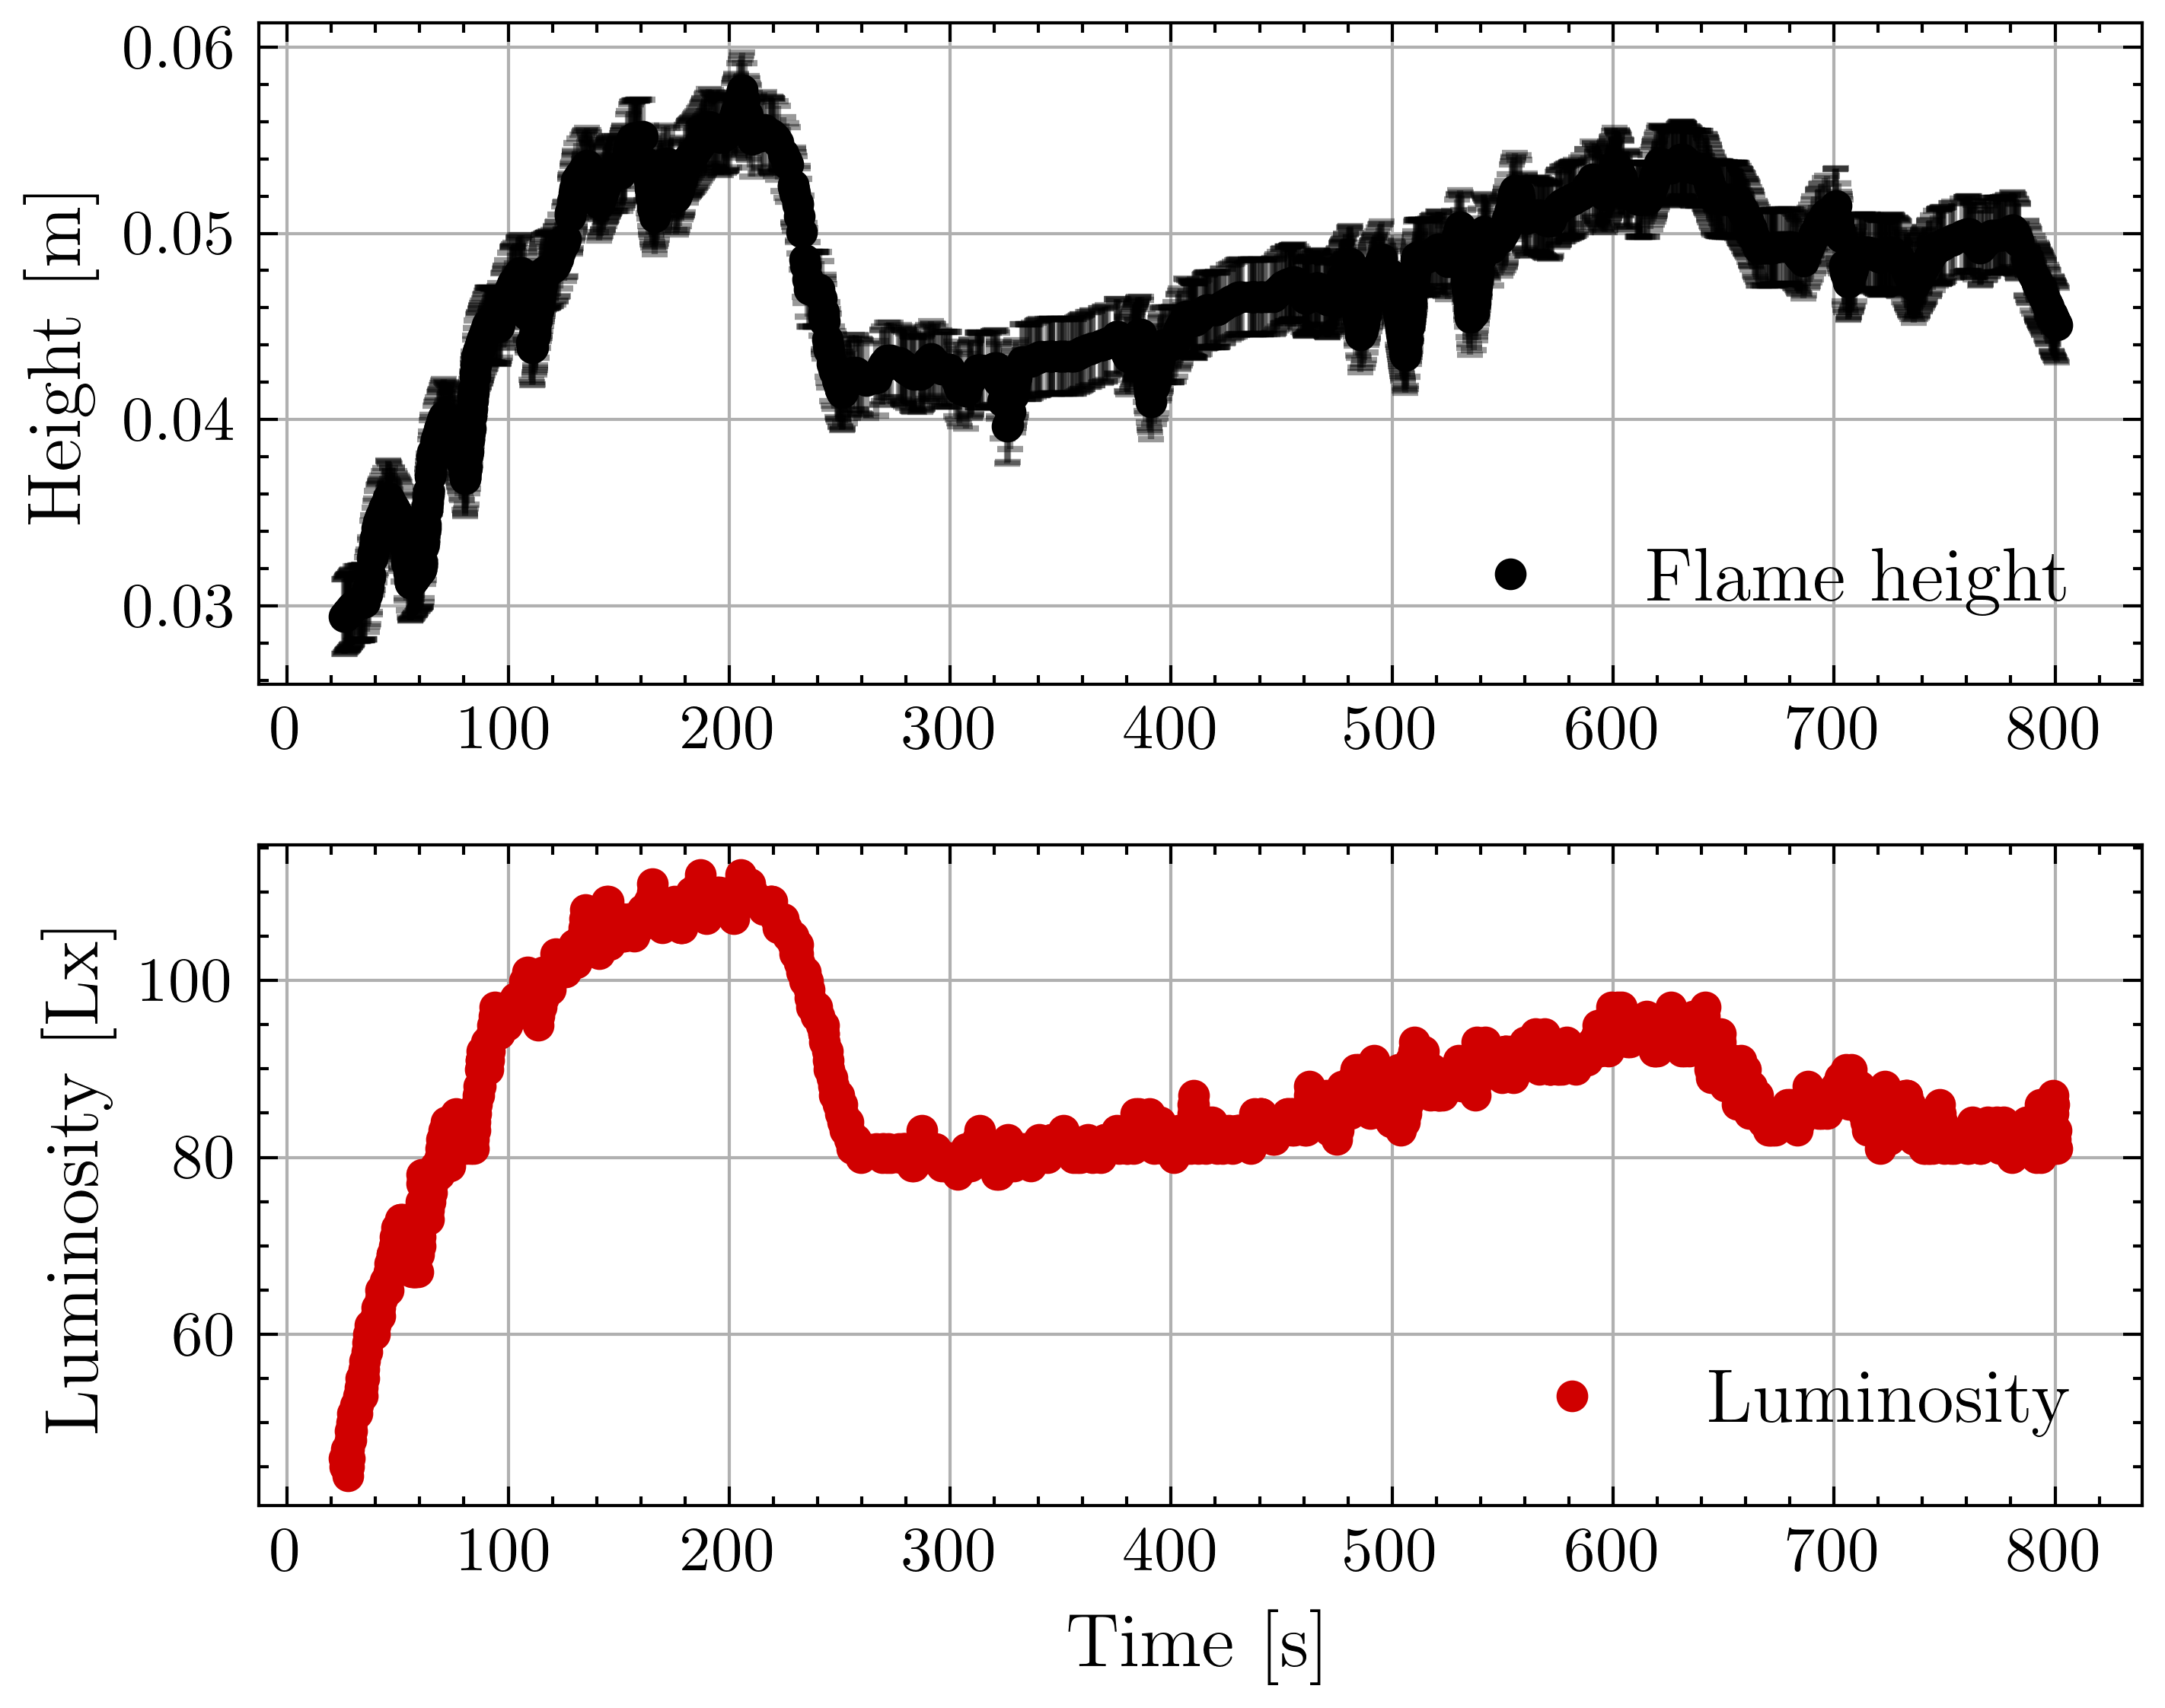

x_2 &= (12.837 ± 1.362)+(1597.727 ± 28.752)t\ \


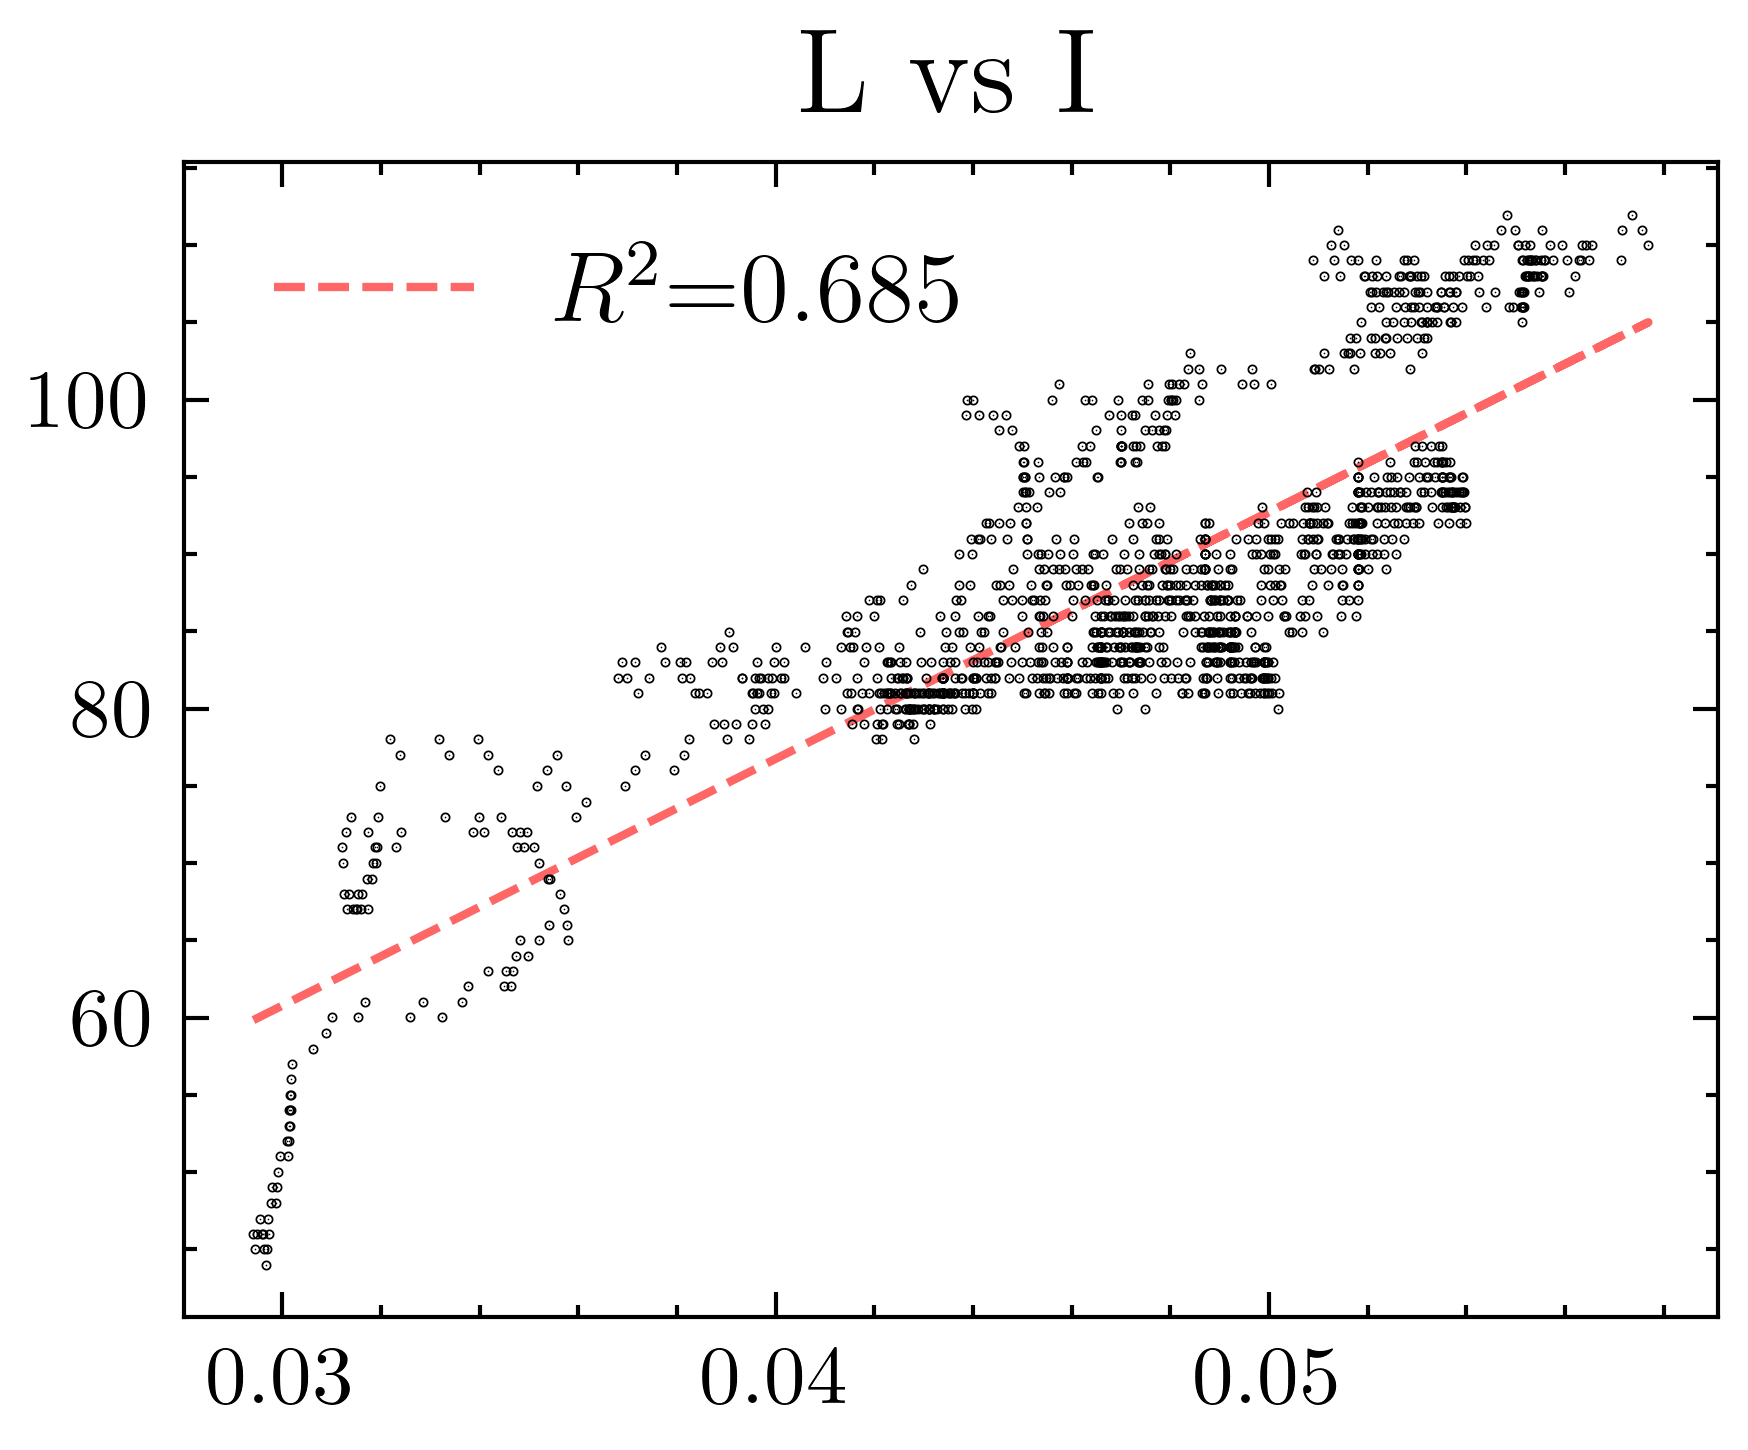

In [ ]:
data = ['/content/candle2_F.csv','/content/Candle_2.csv']

dataraw,dataraww = pd.read_csv(data[0], sep=",", decimal="."),pd.read_csv(data[1], sep=",", decimal=".")
dataraw1,dataraw2 = dataraw.to_numpy(), dataraww.to_numpy()

range_small, range_big = 0, 88

t,L,D = dataraw1[range_small:,0], dataraw1[range_small:,1], dataraw1[range_small:,2]
T,I = dataraw2[range_big:,0], dataraw2[range_big:,1]

from scipy.interpolate import interp1d

linear_interp = interp1d(t, L, kind='linear',fill_value="extrapolate")
L_interp = linear_interp(T)


X,Y=[T,T] , [L_interp,I]

ylabel=['Height [m]','Luminosity [Lx]']
color = ['black','#D00000']
legend = ['Flame height', 'Luminosity']

# Plot each dataset
fig, axes = plt.subplots(2, 1, figsize=(5, 4))
for i, ax in enumerate(axes):
  ax.errorbar(X[i],Y[i],yerr=0.002,fmt='o',color=color[i],alpha=0.4, capsize=2,ms=2)

  ax.plot(X[i],Y[i],color=color[i],marker='o',linestyle='',ms=4,label=legend[i])

  ax.set_ylabel(ylabel[i])
  if i ==1:
    ax.set_xlabel('Time [s]')

  ax.legend()
  ax.grid()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

plt.title('L vs I')
popt1, covt1 = curve_fit(g, L_interp, I)
a0,a1 = popt1
A = [a0,a1]
print('x_{} &= ({:.3f} ± {:.3f})+({:.3f} ± {:.3f})t\\ \\'.format(i+1,popt1[0],np.sqrt(covt1[0,0]),popt1[1],np.sqrt(covt1[1,1])))
plt.plot(L_interp,g(L_interp,a0,a1),color='red',linestyle='--',alpha=0.6,label='$R^2$={:.3f}'.format(R_squared(g(L_interp,a0,a1),I)))
plt.plot(L_interp,I,marker='o',ms=0.2,linestyle='')
plt.legend()
plt.show()



In [ ]:



data1 = ['/content/candle1_F.csv','/content/Candle_1.csv']
data2 = ['/content/candle2_F.csv','/content/Candle_2.csv']
data3 = ['/content/candle3_F.csv','/content/Candle_3.csv']
data4 = ['/content/candle4_F.csv','/content/Candle_4.csv']
data5 = ['/content/candle5_F.csv','/content/Candle_5.csv']
data6 = ['/content/candle6_F.csv','/content/Candle_6.csv']
data7 = ['/content/candle7_F.csv','/content/Candle_7.csv']
data8 = ['/content/candle8_F.csv','/content/Candle_8.csv']
data9 = ['/content/candle9_F.csv','/content/Candle_9.csv']
data10 = ['/content/candle10_F.csv','/content/Candle_10.csv']
data11 = ['/content/candle11_F.csv','/content/Candle_11.csv']
data12 = ['/content/candle12_F.csv','/content/Candle_12.csv']

#DATA_g = [data2,data5,data7,data8,data9,data10]
#TITLE = ['Candle 2', 'Candle 5', 'Candle 7','Candle 8','Candle 9','Candle 10']
DATA = [data1,data2,data3,data4,data5,data7,data8,data9,data10,data11,data12]

for k in range(len(DATA)):
  data = DATA[k]

  dataraw,dataraww = pd.read_csv(data[0], sep=",", decimal="."), pd.read_csv(data[1], sep=",", decimal=".")
  dataraw1,dataraw2 = dataraw.to_numpy(), dataraww.to_numpy()

  range_small, range_big = 0, 0

  t,L,D = dataraw1[range_small:,0], dataraw1[range_small:,1], dataraw1[range_small:,2]
  T,I = dataraw2[range_big:,0], dataraw2[range_big:,1]

  I_,T_, T_dummy, N = [], [], [], []
  step = 5
  tolerance = 2  # You can adjust this tolerance to allow for slight inaccuracies

  for i in range(int(t[0])+5,int(t[-1])):
    if i%5==0:
      N.append(i)

  p = 0
  for i in range(len(T)):
      if p>len(N)-1:
        break
      r = abs(T[i] - N[p])
      #print('({}) r={}'.format(N[p],r))
      if r <= tolerance:
        #print(i)
        p+=1
        if int(T[i]) not in T_dummy:
            T_dummy.append(int(T[i]))
            I_.append(I[i])
            T_.append(T[i])


  #print(len(T_), T_[0],T_[-1])

  #print(len(t), t[1],t[-1], '\n')

  n=[]
  for i in range(len(T_)):
    #print('{}.  {} {}'.format(i,T_[i],t[i]))
    n.append(i)

  L_shortened =L[:len(I_)]

  popt1, covt1 = curve_fit(g, L_shortened, I_)
  a0,a1 = popt1
  A = [a0,a1]

  rho, p_value = stats.spearmanr(L_shortened, I_)
  tau, p_value = stats.kendalltau(L_shortened, I_)

  print(f"tau={tau}")

  print('x_{} &= ({:.3f} ± {:.3f})+({:.3f} ± {:.3f})t \n {}'.format(k+1,popt1[0],np.sqrt(covt1[0,0]),popt1[1],np.sqrt(covt1[1,1]),R_squared(g(L_shortened,a0,a1),I_)))

  X,Y=[t,T_,L_shortened] , [L,I_,I_]

  ylabel=['Height [m]','Luminosity [Lx]','Luminosity [Lx]']
  xlabel = ['Time [s]','Time [s]','Flame height [m]']
  color = ['black','#D00000','black']
  legend = ['Flame height', f'Luminosity (Shortened) \n {np.mean(I_[60:]):.0f}','Data']

  lim = [0,800]
  # Plot each dataset
  fig, axes = plt.subplots(3, 1, figsize=(6, 5))

  plt.suptitle(f'Candle {k+1}')
  for i, ax in enumerate(axes):
    ax.errorbar(X[i],Y[i],yerr=0.002,fmt='o',color=color[i],alpha=0.4, capsize=2,ms=0.5)

    ax.plot(X[i],Y[i],color=color[i],marker='o',linestyle='',ms=3,label=legend[i])
    if i==2:
      plt.plot(L_shortened,g(L_shortened,a0,a1),color='red',linestyle='--',alpha=0.6,label=r'$\rho$={:.3f}'.format(rho,tau))#'$R^2$={:.3f}'.format(R_squared(g(L_shortened,a0,a1),I_)))
    ax.set_ylabel(ylabel[i])
    ax.set_xlabel(xlabel[i])

    ax.legend()
    ax.grid()


  plt.show()




In [ ]:



for k in range(len(DATA)):
  data = DATA[k]

  dataraw,dataraww = pd.read_csv(data[0], sep=",", decimal="."), pd.read_csv(data[1], sep=",", decimal=".")
  dataraw1,dataraw2 = dataraw.to_numpy(), dataraww.to_numpy()

  range_small, range_big = 0, 0

  t,L,D = dataraw1[range_small:,0], dataraw1[range_small:,1], dataraw1[range_small:,2]
  T,I = dataraw2[range_big:,0], dataraw2[range_big:,1]

  I_,T_, T_dummy, N = [], [], [], []
  step = 5
  tolerance = 2  # You can adjust this tolerance to allow for slight inaccuracies

  for i in range(int(t[0])+5,int(t[-1])):
    if i%5==0:
      N.append(i)

  p = 0
  for i in range(len(T)):
      if p>len(N)-1:
        break
      r = abs(T[i] - N[p])
      #print('({}) r={}'.format(N[p],r))
      if r <= tolerance:
        #print(i)
        p+=1
        if int(T[i]) not in T_dummy:
            T_dummy.append(int(T[i]))
            I_.append(I[i])
            T_.append(T[i])

  #print(len(T_), T_[0],T_[-1])

  #print(len(t), t[1],t[-1], '\n')

  n=[]
  for i in range(len(T_)):
    #print('{}.  {} {}'.format(i,T_[i],t[i]))
    n.append(i)

  L_shortened =L[:len(I_)]

  popt1, covt1 = curve_fit(g, L_shortened, I_)
  a0,a1 = popt1
  A = [a0,a1]

  rho, p_value = stats.spearmanr(L_shortened, I_)
  tau, p_value = stats.kendalltau(L_shortened, I_)

  print(f"tau={tau}")

  print('x_{} &= ({:.3f} ± {:.3f})+({:.3f} ± {:.3f})t \n {}'.format(k+1,popt1[0],np.sqrt(covt1[0,0]),popt1[1],np.sqrt(covt1[1,1]),R_squared(g(L_shortened,a0,a1),I_)))

  X,Y=[t,T_,L_shortened] , [L,I_,I_]

  ylabel = ['Length [m]', 'Luminosity [Lx]']
  color = ['black', '#D00000']
  legend = ['Flame height', 'Luminosity \n ' r'$\rho=${:.3f}'.format(rho)]

  lim = [0,800]
  # Plot each dataset
  # Create a single plot
  fig, ax1 = plt.subplots(figsize=(5, 4))

  # Plot the first dataset (Flame height)
  ax1.errorbar(X[0], Y[0], yerr=0.0015, fmt='o', color=color[0], alpha=0.4, capsize=2, ms=2)
  ax1.plot(X[0], Y[0], color=color[0], marker='o', linestyle='', ms=4, label=legend[0])

  ax1.errorbar(X[0], D, yerr=0.0015, fmt='o', color='gray', alpha=0.4, capsize=2, ms=2)
  ax1.plot(X[0], D, color='gray', marker='o', linestyle='', ms=4, label='Wax Pool Diameter')

  ax1.set_ylabel(ylabel[0], color=color[0])
  ax1.tick_params(axis='y', labelcolor=color[0])
  ax1.legend(loc='upper right')
  ax1.grid()

  # Create a twin y-axis for the second dataset (Luminosity)
  ax2 = ax1.twinx()
  ax2.errorbar(X[1], Y[1], yerr=0.0015, fmt='o', color=color[1], alpha=0.4, capsize=2, ms=2)
  ax2.plot(X[1], Y[1], color=color[1], marker='o', linestyle='', ms=4, label=legend[1])
  ax2.set_ylabel(ylabel[1], color=color[1])
  ax2.tick_params(axis='y', labelcolor=color[1])
  ax2.legend(loc='lower right')

  # Set x-axis label
  ax1.set_xlabel('Time [s]')

  # Add a title
  #plt.legend()
  #plt.suptitle(f'Candle {k+1}')

  # Show the plot
  plt.show()


In [ ]:
max_r = []
rhos = []
for k in range(len(DATA)):
  data = DATA[k]

  dataraw,dataraww = pd.read_csv(data[0], sep=",", decimal="."), pd.read_csv(data[1], sep=",", decimal=".")
  dataraw1,dataraw2 = dataraw.to_numpy(), dataraww.to_numpy()

  range_small, range_big = 0, 0

  t,L,D = dataraw1[range_small:,0], dataraw1[range_small:,1], dataraw1[range_small:,2]
  T,I = dataraw2[range_big:,0], dataraw2[range_big:,1]

  I_,T_, T_dummy, N = [], [], [], []
  step = 5
  tolerance = 2  # You can adjust this tolerance to allow for slight inaccuracies

  for i in range(int(t[0])+5,int(t[-1])):
    if i%5==0:
      N.append(i)

  p = 0
  for i in range(len(T)):
      if p>len(N)-1:
        break
      r = abs(T[i] - N[p])
      #print('({}) r={}'.format(N[p],r))
      if r <= tolerance:
        #print(i)
        p+=1
        if int(T[i]) not in T_dummy:
            T_dummy.append(int(T[i]))
            I_.append(I[i])
            T_.append(T[i])

  #print(len(T_), T_[0],T_[-1])

  #print(len(t), t[1],t[-1], '\n')

  n=[]
  for i in range(len(T_)):
    #print('{}.  {} {}'.format(i,T_[i],t[i]))
    n.append(i)

  L_shortened =L[:len(I_)]

  popt1, covt1 = curve_fit(g, L_shortened, I_)
  a0,a1 = popt1
  A = [a0,a1]

  rho, p_value = stats.spearmanr(L_shortened, I_)
  tau, p_value = stats.kendalltau(L_shortened, I_)

  print(f"tau={tau}")
  print(f"max <400s {max(I_[:80])}, d={D[I_.index(max(I_[:80]))]}")

  max_r.append(D[I_.index(max(I_[:80]))])
  rhos.append(rho)
  print('x_{} &= ({:.3f} ± {:.3f})+({:.3f} ± {:.3f})t \n {}'.format(k+1,popt1[0],np.sqrt(covt1[0,0]),popt1[1],np.sqrt(covt1[1,1]),R_squared(g(L_shortened,a0,a1),I_)))

  X,Y=[t,T_,L_shortened] , [L,I_,I_]

  ylabel = ['Length [m]', 'Luminosity [Lx]']
  color = ['black', '#D00000']
  legend = ['Flame height', 'Luminosity \n ' r'$\rho=${:.3f}'.format(rho)]

  lim = [0,800]
  # Plot each dataset
  # Create a single plot

  fig, ax1 = plt.subplots(figsize=(5, 4))  # Figure size

  # Plot the first dataset (Flame height)
  ax1.errorbar(X[0], Y[0], yerr=0.0015, fmt='o', color=color[0], alpha=0.4, capsize=2, ms=2)
  ax1.plot(X[0], Y[0], color=color[0], marker='o', linestyle='', ms=4, label=legend[0])

  ax1.errorbar(X[0], D, yerr=0.0015, fmt='o', color='gray', alpha=0.4, capsize=2, ms=2)
  ax1.plot(X[0], D, color='gray', marker='o', linestyle='', ms=4, label='Wax Pool Diameter')

  ax1.set_ylabel(ylabel[0], color=color[0])
  ax1.tick_params(axis='y', labelcolor=color[0])
  ax1.grid()

  # Create a twin y-axis for the second dataset (Luminosity)
  ax2 = ax1.twinx()
  ax2.errorbar(X[1], Y[1], yerr=1, fmt='o', color=color[1], alpha=0.4, capsize=2, ms=2)
  ax2.plot(X[1], Y[1], color=color[1], marker='o', linestyle='', ms=4, label=legend[1])
  ax2.set_ylabel(ylabel[1], color=color[1])
  ax2.tick_params(axis='y', labelcolor=color[1])

  # Set x-axis label
  ax1.set_xlabel('Time [s]')

  # Combine legends from both axes
  lines1, labels1 = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

  # Adjust layout to ensure the legend is fully above the plot
  plt.tight_layout(rect=[0, 0, 1, 0.9])  # Leave extra space at the top for the legend

  # Show the plot
  plt.show()
print(max_r)
print(np.mean(max_r))

In [ ]:
print(np.average(rhos))

0.8119103902053912


In [ ]:
A = [0.0144, 0.0124, 0.008918478, 0.01527767, 0.01225322, 0.0177, 0.01245902, 0.0139, 0.00955]
sum =0
for i in range(len(A)):
  sum += A[i]
print(sum/len(A))

0.012984265333333333
